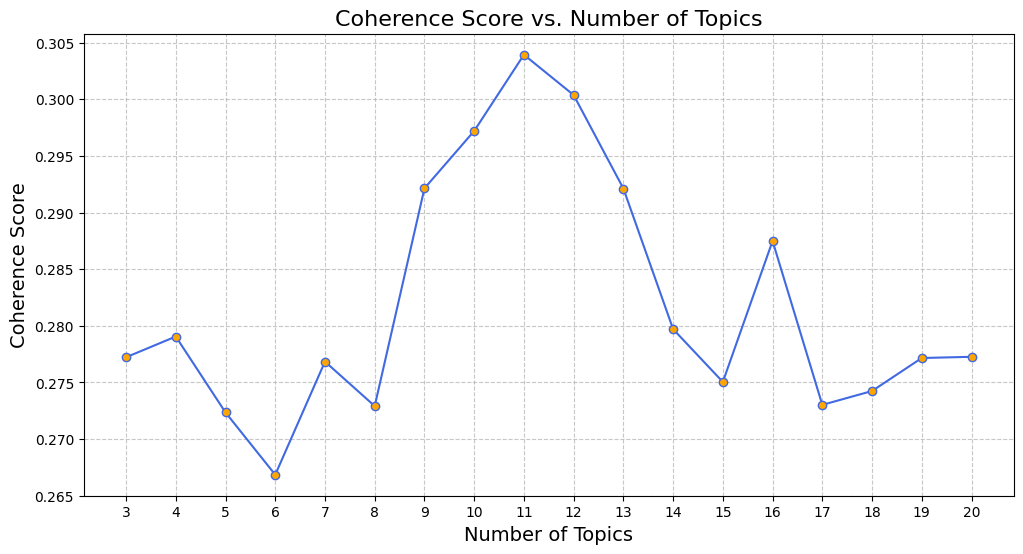

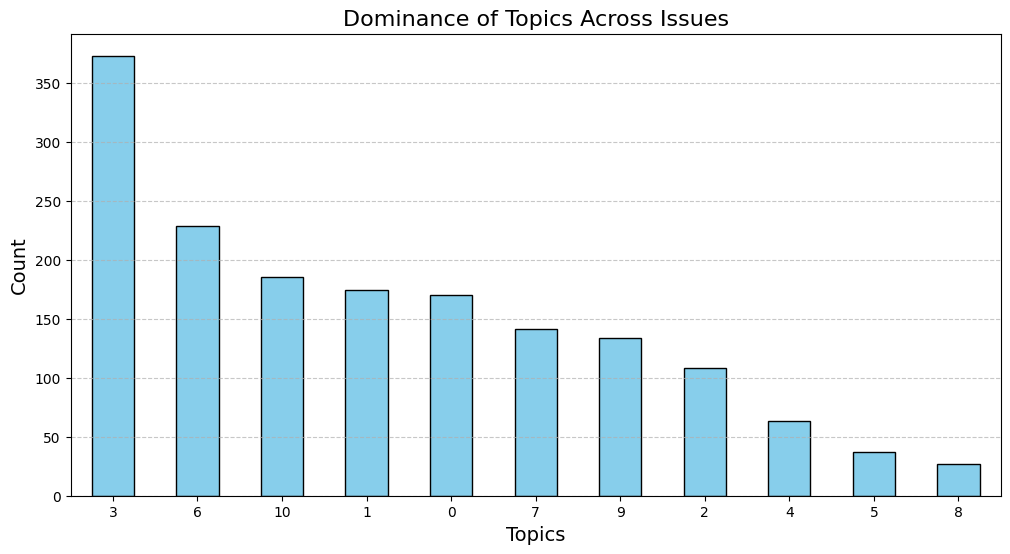

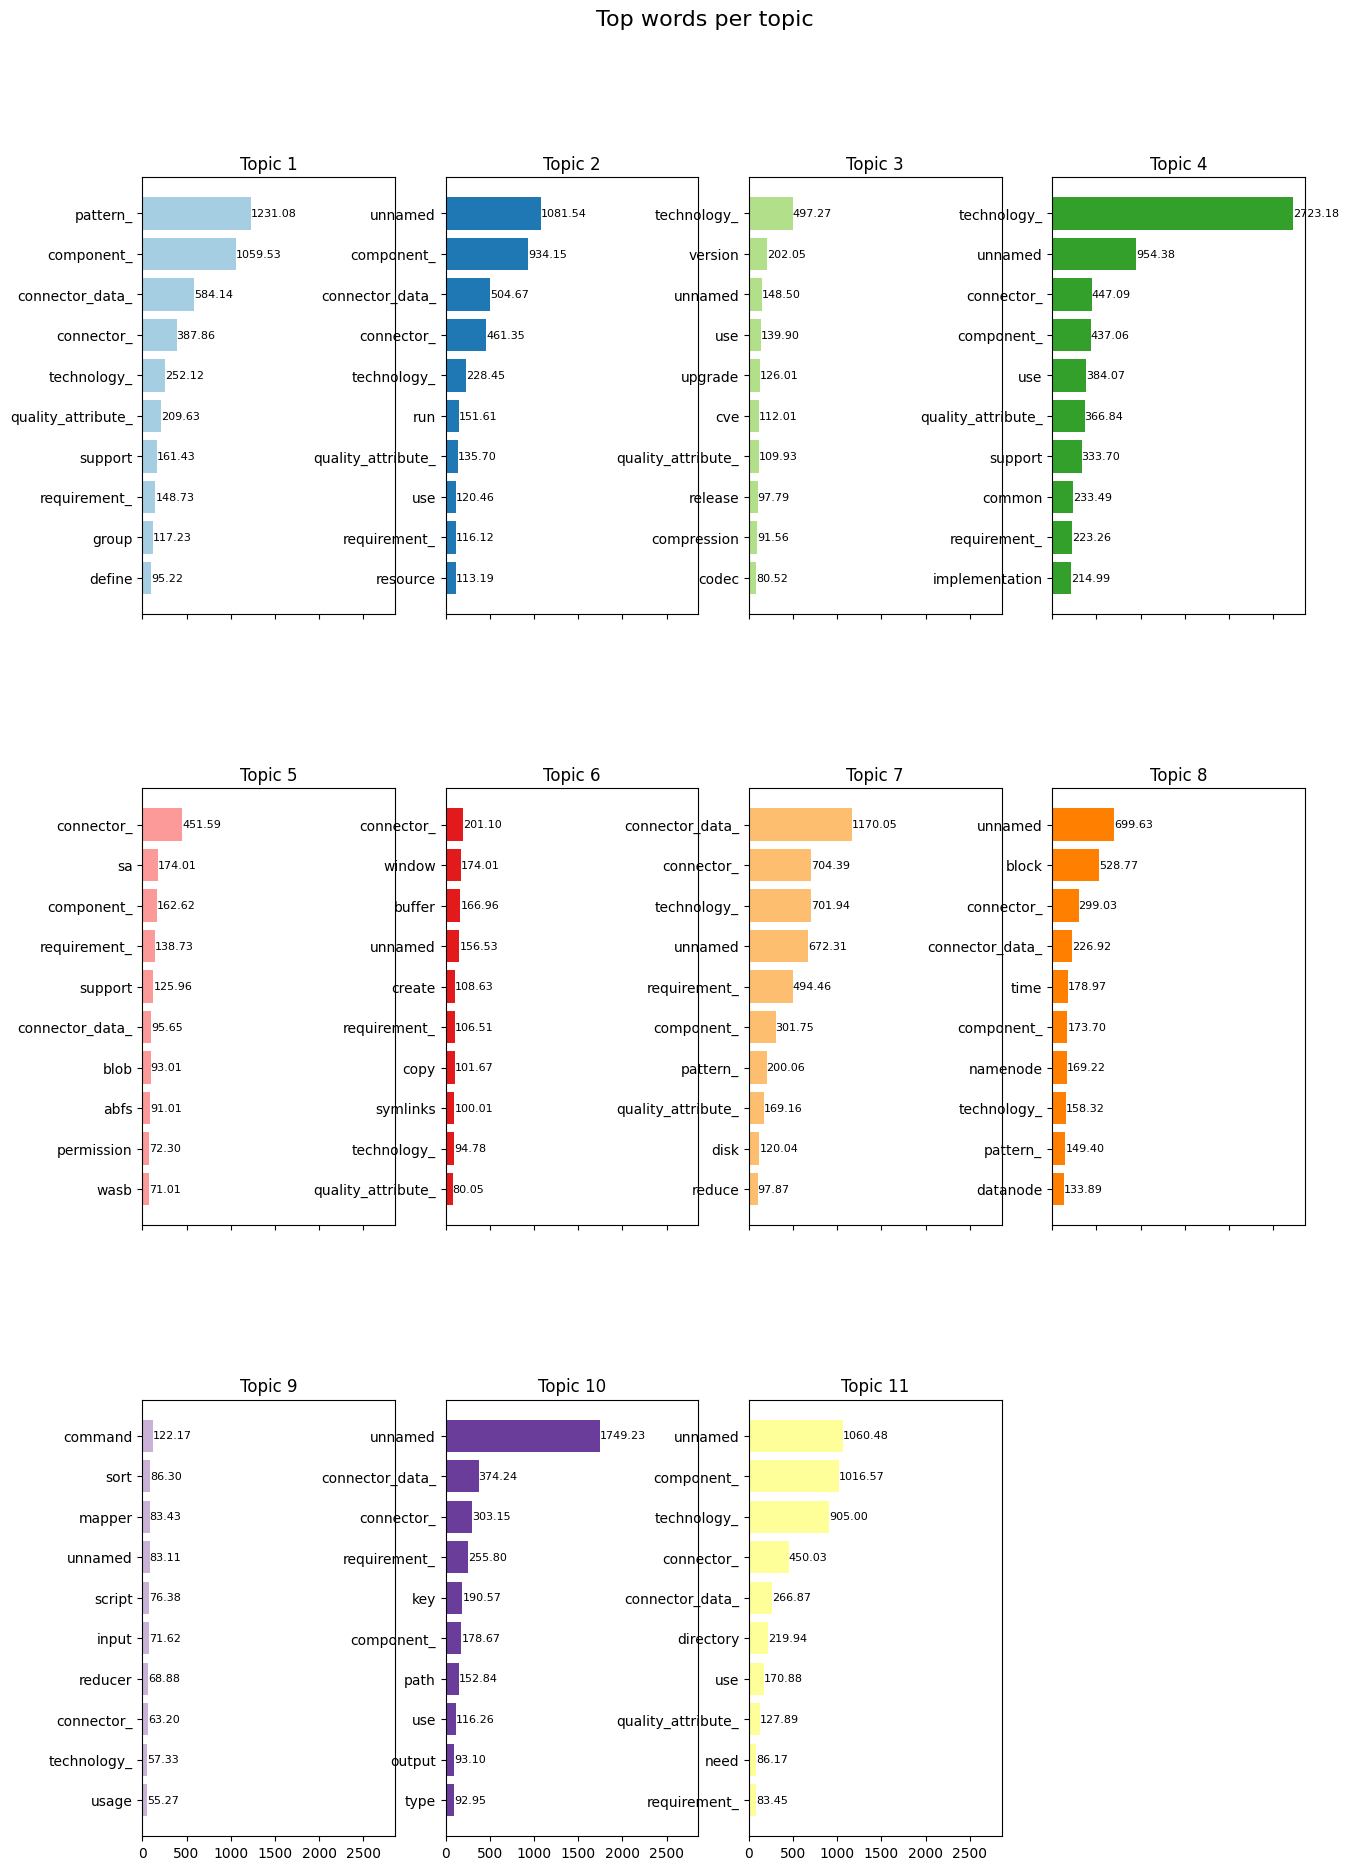

Topic 0:
pattern_ component_ connector_data_ connector_ technology_ quality_attribute_ support requirement_ group define
Topic 1:
unnamed component_ connector_data_ connector_ technology_ run quality_attribute_ use requirement_ resource
Topic 2:
technology_ version unnamed use upgrade cve quality_attribute_ release compression codec
Topic 3:
technology_ unnamed connector_ component_ use quality_attribute_ support common requirement_ implementation
Topic 4:
connector_ sa component_ requirement_ support connector_data_ blob abfs permission wasb
Topic 5:
connector_ window buffer unnamed create requirement_ copy symlinks technology_ quality_attribute_
Topic 6:
connector_data_ connector_ technology_ unnamed requirement_ component_ pattern_ quality_attribute_ disk reduce
Topic 7:
unnamed block connector_ connector_data_ time component_ namenode technology_ pattern_ datanode
Topic 8:
command sort mapper unnamed script input reducer connector_ technology_ usage
Topic 9:
unnamed connector_data_

In [13]:
# Import necessary modules
from topic_analysis import load_document_term_matrix, plot_top_words, plot_coherence_scores, plot_topic_dominance
import pandas as pd
import os
from config import DEFAULT_DATA_PATH
import joblib

# Load preprocessed data
df = pd.read_excel(os.path.join(DEFAULT_DATA_PATH, 'preprocessed_issue_details.xlsx'))

# Load saved DTM and LDA model
dtm, vectorizer = load_document_term_matrix(os.path.join(DEFAULT_DATA_PATH, 'dtm.npz'))
lda = joblib.load(os.path.join(DEFAULT_DATA_PATH, 'lda_model.pkl'))

topic_proportions = lda.transform(dtm)
dominant_topic = topic_proportions.argmax(axis=1)
df['dominant_topic'] = dominant_topic

# Load coherence scores
coherence_scores_df = pd.read_csv(os.path.join(DEFAULT_DATA_PATH, 'coherence_scores.csv'))
num_topics_range = coherence_scores_df['num_topics']
coherence_scores = coherence_scores_df['coherence_score']

# Plot coherence scores
plot_coherence_scores(num_topics_range, coherence_scores, show_plot=True)

# Plot dominance of topics
plot_topic_dominance(df, show_plot=True)

# Plot top words for each topic
plot_top_words(lda, vectorizer.get_feature_names_out(), 10, 'Top words per topic', show_plot=True)

# Display topics
from topic_analysis import display_topics
topics = display_topics(lda, vectorizer.get_feature_names_out(), 10)
